In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [149]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: C:\Users\ryanr\OneDrive\Documents\JN PLAYGROUND\Supervised Algorithms\Decision Trees\HR-Employee-Attrition.csv

  0%|          | 0.00/228k [00:00<?, ?B/s]
100%|##########| 228k/228k [00:00<00:00, 9.38MB/s]


In [150]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [151]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


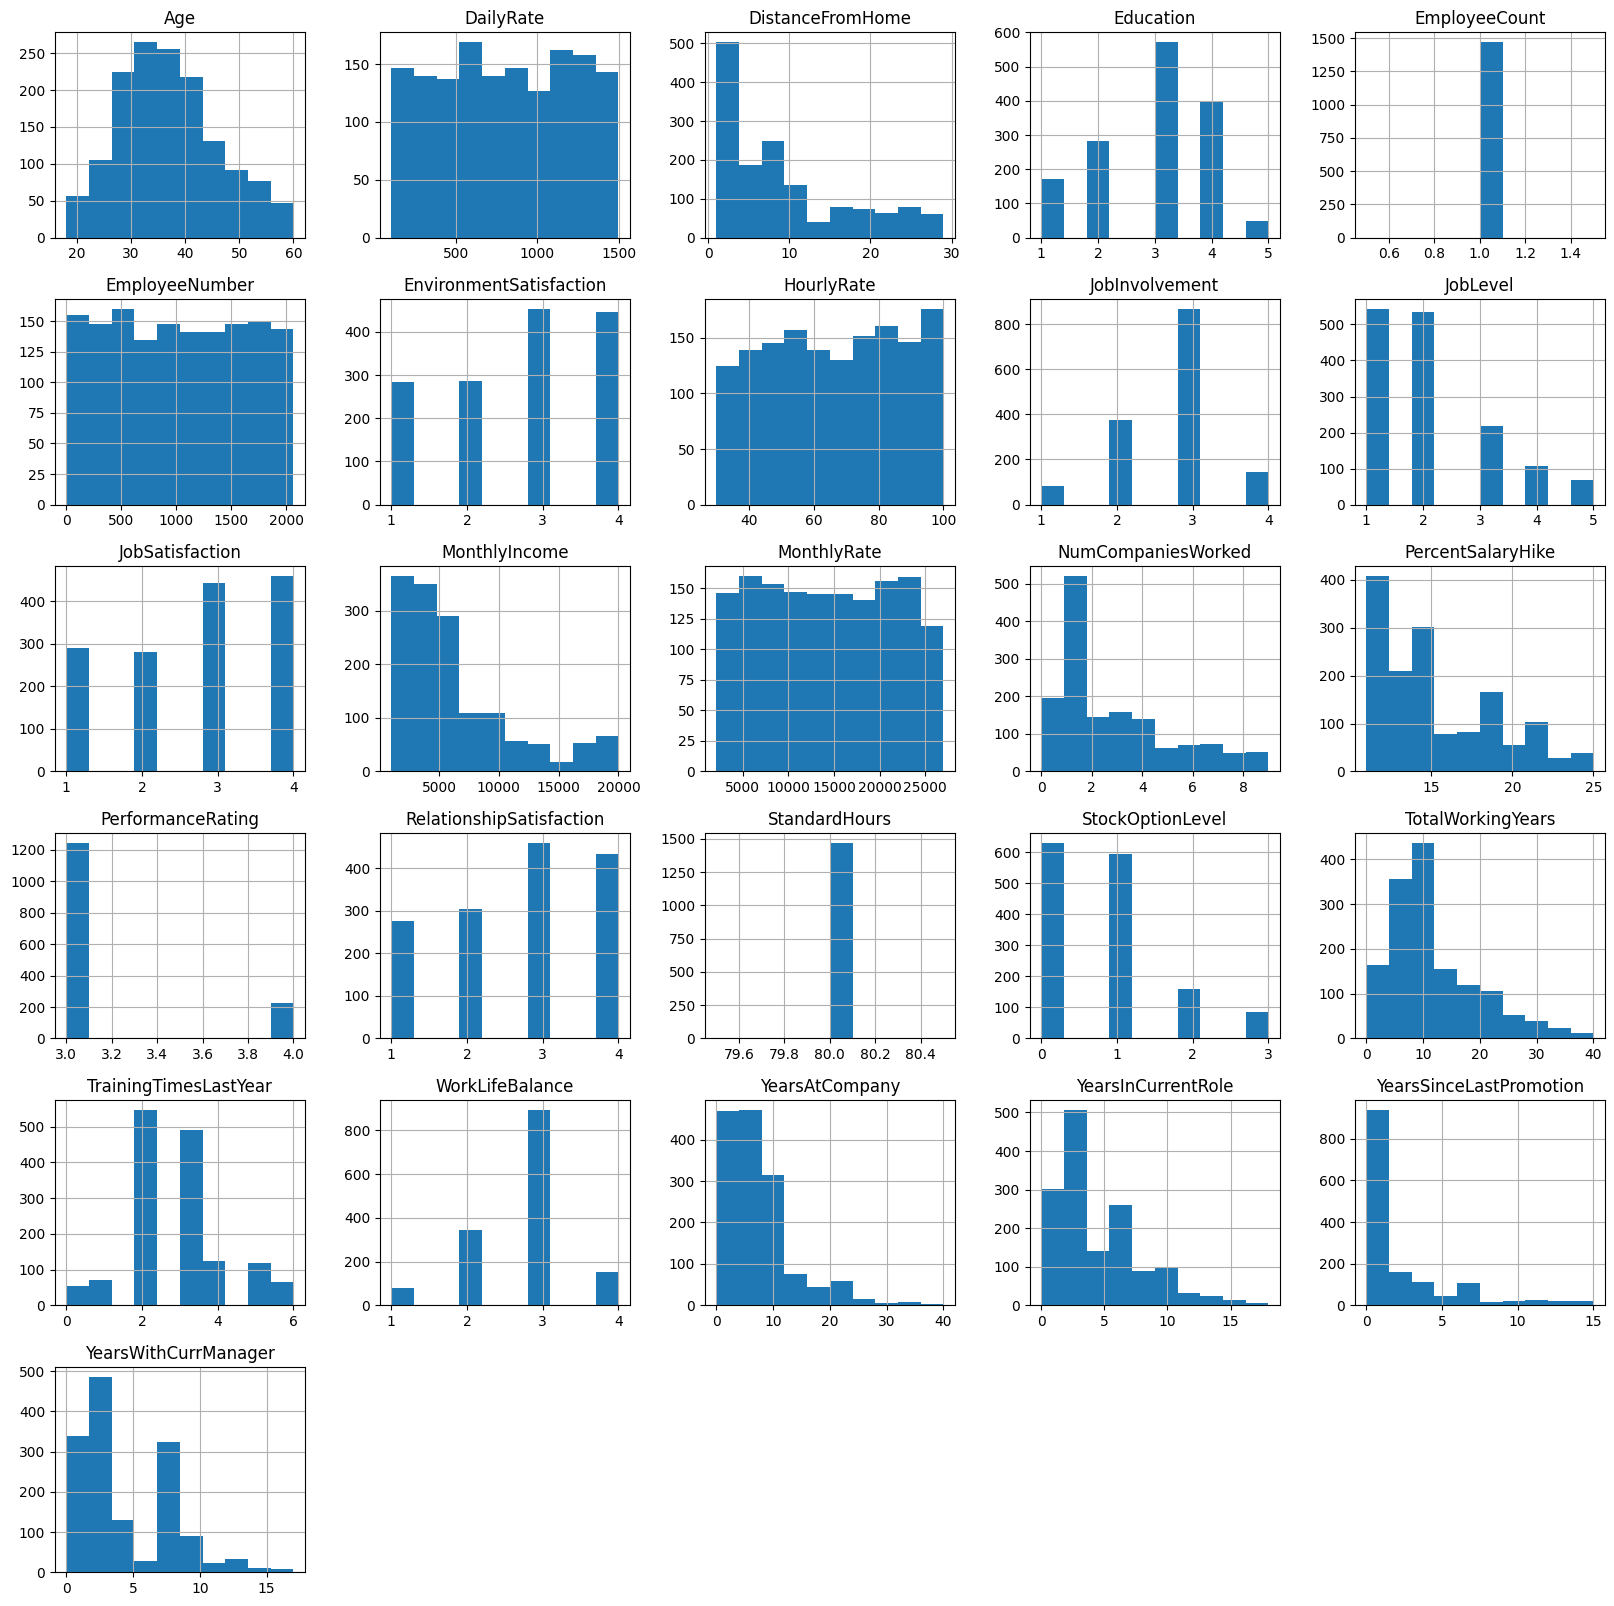

In [152]:
df.hist(figsize = (20,20))
plt.show()

In [153]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [154]:
def unique_vals(col):

  if col.dtype == "object":

    print(f'{col.name}: {col.nunique()}')

df.apply(lambda col: unique_vals(col))

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


Age                         None
Attrition                   None
BusinessTravel              None
DailyRate                   None
Department                  None
DistanceFromHome            None
Education                   None
EducationField              None
EnvironmentSatisfaction     None
Gender                      None
HourlyRate                  None
JobInvolvement              None
JobLevel                    None
JobRole                     None
JobSatisfaction             None
MaritalStatus               None
MonthlyIncome               None
MonthlyRate                 None
NumCompaniesWorked          None
OverTime                    None
PercentSalaryHike           None
PerformanceRating           None
RelationshipSatisfaction    None
StockOptionLevel            None
TotalWorkingYears           None
TrainingTimesLastYear       None
WorkLifeBalance             None
YearsAtCompany              None
YearsInCurrentRole          None
YearsSinceLastPromotion     None
YearsWithC

#### On basis of this info, which encoding technique should we use ?

 - We will use binary encoding for features with 2 or less unique val.
 - For features < 6 unique vals we will use OneHot encoding
 - Rest of the categorical features will be Target encoded


In [155]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))

Attrition
Gender
OverTime


In [156]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)

In [157]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,2,0,94,3,...,6,4,0,5,False,True,False,True,False,True
1,49,0,279,8,1,Life Sciences,3,1,61,2,...,10,7,1,7,True,False,True,False,True,False
2,37,1,1373,2,2,Other,4,1,92,2,...,0,0,0,0,False,True,True,False,False,True
3,33,0,1392,3,4,Life Sciences,4,0,56,3,...,8,7,3,0,True,False,True,False,True,False
4,27,0,591,2,1,Medical,1,1,40,3,...,2,2,2,2,False,True,True,False,True,False


In [158]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [159]:
target.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [160]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [161]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

In [162]:
#Upsampling using SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [163]:
X_train.shape

(1102, 33)

In [164]:
X_test.shape

(368, 33)

In [165]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
1011,36,1174,3,4,0.233869,1,0,99,3,2,...,5,4,0,1,False,True,False,True,False,True
1152,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,False,True,True,False,False,True
650,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,True,False,True,False,True,False
824,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,False,True,True,False,False,True
1108,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,False,True,True,False,False,True


### Entropy calculations

In [166]:
-np.log2(1/6)/6

np.float64(0.430827083453526)

In [167]:
(1/6)*(np.log2(1/6)) + (1/6)*(np.log2(5/6))

np.float64(-0.4746661510924916)

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [170]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [171]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 1])

In [172]:
model.score(X_test, y_test)

0.8233695652173914

#### Overfitted model...

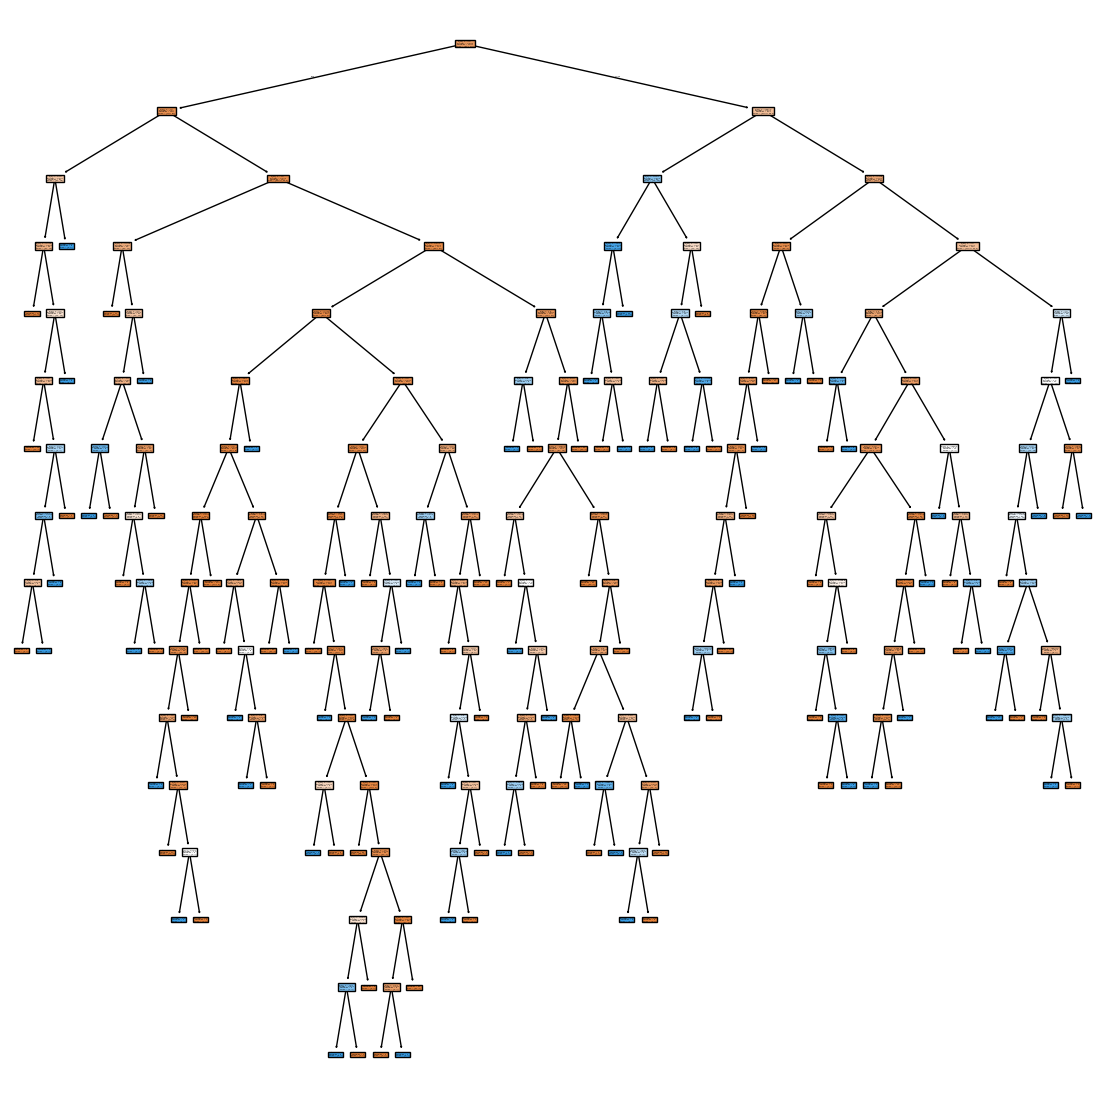

In [173]:
#Add the semi-colon!
from sklearn.tree import plot_tree

plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

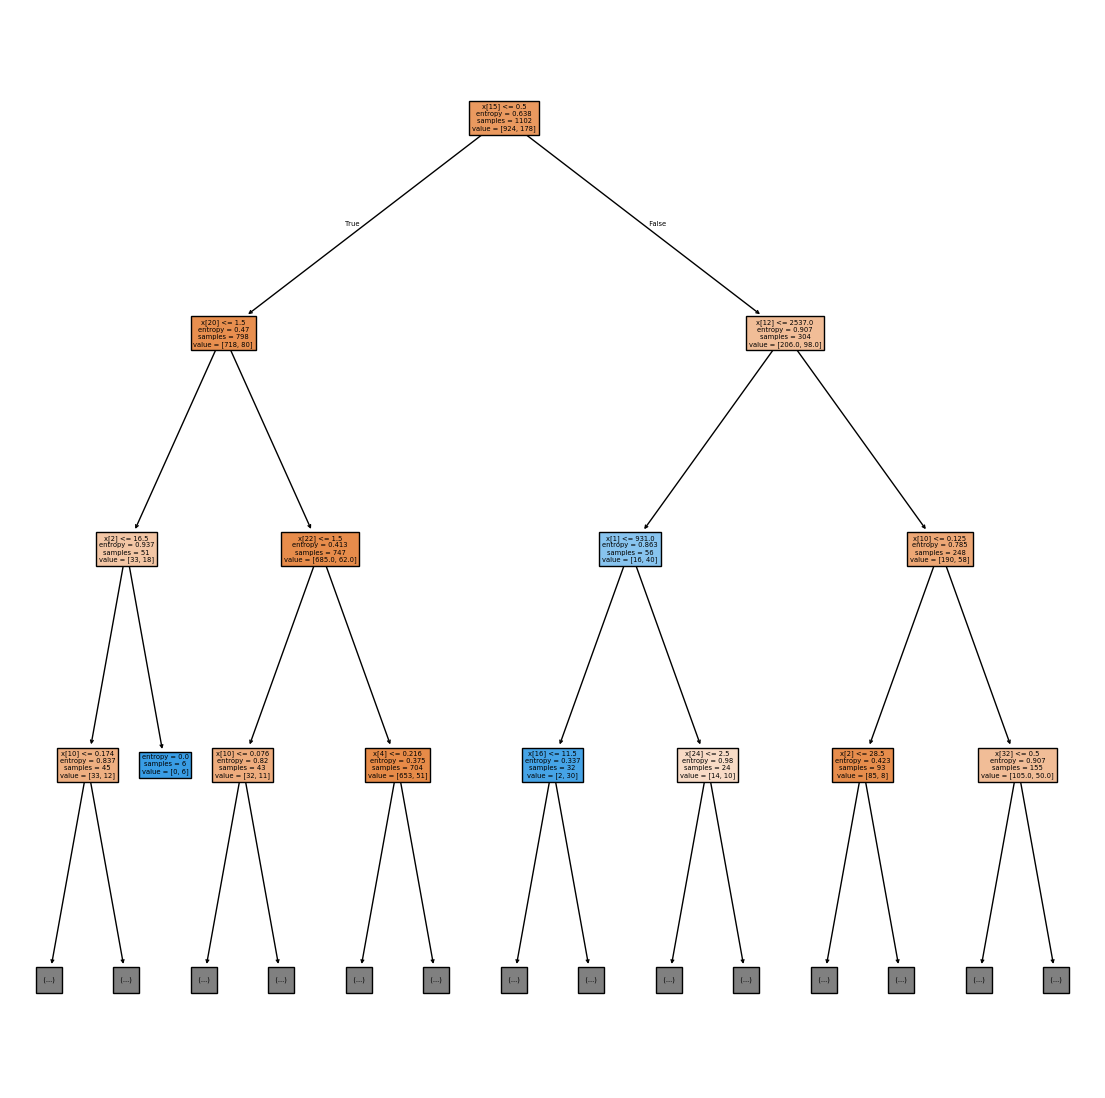

In [174]:
plt.figure(figsize = (14,14))
plot_tree(model, filled = True, max_depth = 3);

In [175]:
(3/7)*np.log2(3/7) + 4/7*np.log2(4/7)

np.float64(-0.9852281360342515)

In [176]:
# IG(Humidity) = H(Parent) -H(Child)
# IG(Outlook)
# IG(Wind)
# IG(Temperature)

In [177]:
X_train['Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [178]:
model.tree_.max_depth

15

In [179]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [180]:
depths = [1,2, 3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = 10, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} \
            Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(4)*100} \
            Validation: {cv_acc_results['test_score'].mean().round(4)*100}")

    print('***************')

K-Fold for depth:1             Accuracy Mean: Train: 83.85000000000001             Validation: 83.85000000000001
***************
K-Fold for depth:2             Accuracy Mean: Train: 85.87             Validation: 84.48
***************
K-Fold for depth:3             Accuracy Mean: Train: 86.91             Validation: 84.75
***************
K-Fold for depth:4             Accuracy Mean: Train: 88.92999999999999             Validation: 84.03
***************
K-Fold for depth:5             Accuracy Mean: Train: 90.72             Validation: 83.03
***************
K-Fold for depth:6             Accuracy Mean: Train: 92.52             Validation: 83.03
***************
K-Fold for depth:7             Accuracy Mean: Train: 94.16             Validation: 81.75
***************
K-Fold for depth:9             Accuracy Mean: Train: 96.98             Validation: 80.94
***************
K-Fold for depth:11             Accuracy Mean: Train: 98.77             Validation: 77.94
***************
K-Fold for depth:1

In [181]:
tree_clf = DecisionTreeClassifier(random_state = 7, max_depth = 6)
tree_clf = tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

In [182]:
tree_clf.score(X_train, y_train)

0.9228675136116152

In [183]:
tree_clf.score(X_test, y_test)

0.8478260869565217

In [184]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.